In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
#Accessing 1st data sheet from xlsx
df1=pd.read_excel("drive/MyDrive/Assignment.xlsx", sheet_name='Tweets',header=[1])
df1.head()

Unnamed: 0  Tweet Sl No.         username  followersCount  friendsCount  \
0         NaN             1   The_Shawn_News              86            77   
1         NaN             2  Jaganmo05121164             317           173   
2         NaN             3  MedikonduriRam3              42           162   
3         NaN             4     MadhimugamTV            2292             6   
4         NaN             5  MedikonduriRam3              42           162   

         Date            Time  Shares  Likes  Citations  
0  2022-06-02  06:18:01+00:00       0      1          0  
1  2022-06-02  05:42:00+00:00       2      4          0  
2  2022-06-02  05:22:07+00:00       0      0          0  
3  2022-06-02  05:19:06+00:00       0      0          0  
4  2022-06-02  05:14:12+00:00       0      0          0

In [4]:
#Accessing 1st data sheet from xlsx
#Making the column name same for both dataframes so that we can merge the data into one dataframe
df2=pd.read_excel("drive/MyDrive/Assignment.xlsx", sheet_name='Users',header=[1])
df2=df2.rename(columns = {'User-names':'username'})
df2.head()

Unnamed: 0         username Gender  Age
0         NaN   The_Shawn_News      F   25
1         NaN  Jaganmo05121164      M   39
2         NaN  MedikonduriRam3      M   24
3         NaN     MadhimugamTV      F   59
4         NaN  DrRSure16602075      M   22

In [5]:
#merging the two dataframes into one for easier analysis of data
#inner join is used on username, duplicate column is removed
df=df1.merge(df2, how='inner', on='username')
df.head()

Unnamed: 0_x  Tweet Sl No.         username  followersCount  friendsCount  \
0           NaN             1   The_Shawn_News              86            77   
1           NaN          3567   The_Shawn_News              86            77   
2           NaN             2  Jaganmo05121164             317           173   
3           NaN            13  Jaganmo05121164             317           173   
4           NaN            36  Jaganmo05121164             317           173   

         Date            Time  Shares  Likes  Citations  Unnamed: 0_y Gender  \
0  2022-06-02  06:18:01+00:00       0      1          0           NaN      F   
1  2022-04-05  08:25:08+00:00       0      2          0           NaN      F   
2  2022-06-02  05:42:00+00:00       2      4          0           NaN      M   
3  2022-06-02  04:22:27+00:00       0      1          0           NaN      M   
4  2022-06-02  01:23:10+00:00       0      1          0           NaN      M   

   Age  
0   25  
1   25  
2   39  
3   39  
4   39

In [6]:
df.info()#we have some null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40690 entries, 0 to 40689
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0_x    0 non-null      float64
 1   Tweet Sl No.    40690 non-null  int64  
 2   username        40690 non-null  object 
 3   followersCount  40690 non-null  int64  
 4   friendsCount    40690 non-null  int64  
 5   Date            40690 non-null  object 
 6   Time            40690 non-null  object 
 7   Shares          40690 non-null  int64  
 8   Likes           40690 non-null  int64  
 9   Citations       40690 non-null  int64  
 10  Unnamed: 0_y    0 non-null      float64
 11  Gender          40690 non-null  object 
 12  Age             40690 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 4.3+ MB


In [7]:
#Removing the column with all null values
df = df.drop('Unnamed: 0_x', 1)
df = df.drop('Unnamed: 0_y', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.describe()

Tweet Sl No.  followersCount  friendsCount        Shares         Likes  \
count  40690.000000    4.069000e+04  40690.000000  40690.000000  40690.000000   
mean   20345.500000    1.653911e+05    612.654829      3.548513     14.885107   
std    11746.335563    1.162361e+06   1928.020145     33.783248    184.991082   
min        1.000000    0.000000e+00      0.000000      0.000000      0.000000   
25%    10173.250000    2.400000e+01     42.000000      0.000000      0.000000   
50%    20345.500000    3.540000e+02    174.000000      0.000000      0.000000   
75%    30517.750000    2.490000e+03    576.000000      1.000000      2.000000   
max    40690.000000    1.795326e+07  74330.000000   4020.000000  16784.000000   

          Citations           Age  
count  40690.000000  40690.000000  
mean       0.208823     38.886778  
std        2.430850     12.561459  
min        0.000000     18.000000  
25%        0.000000     27.000000  
50%        0.000000     39.000000  
75%        0.000000     51.000000  
max      206.000000     60.000000

In [9]:
#We get a general statistical behaviour of data, higher std means the data is more dispersed, we can see
#from data that 50% of users are below the age of 39. Shares, Likes, Citation is highly skewed.
#50% of users have friends count below 174 and followers count below 354.

In [10]:
#coverting date and time from object to datetime datatype
#To study activity of each user
df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

In [11]:
#making two columns from time, one of time and another UTC of format HH:MM
df[['Time', 'UTC']] = df['Time'].str.split('+', 1, expand=True)
df.head()

Tweet Sl No.         username  followersCount  friendsCount       Date  \
0             1   The_Shawn_News              86            77 2022-06-02   
1          3567   The_Shawn_News              86            77 2022-04-05   
2             2  Jaganmo05121164             317           173 2022-06-02   
3            13  Jaganmo05121164             317           173 2022-06-02   
4            36  Jaganmo05121164             317           173 2022-06-02   

       Time  Shares  Likes  Citations Gender  Age    UTC  
0  06:18:01       0      1          0      F   25  00:00  
1  08:25:08       0      2          0      F   25  00:00  
2  05:42:00       2      4          0      M   39  00:00  
3  04:22:27       0      1          0      M   39  00:00  
4  01:23:10       0      1          0      M   39  00:00

In [12]:
#converting time column to timedelta dtype
df['Time']=pd.to_timedelta(df['Time'])
#extra string was seen in hte begining
df['Time'] = df['Time'].astype(str).map(lambda x: x[7:])#removing extra strings 0 days
df.head()

Tweet Sl No.         username  followersCount  friendsCount       Date  \
0             1   The_Shawn_News              86            77 2022-06-02   
1          3567   The_Shawn_News              86            77 2022-04-05   
2             2  Jaganmo05121164             317           173 2022-06-02   
3            13  Jaganmo05121164             317           173 2022-06-02   
4            36  Jaganmo05121164             317           173 2022-06-02   

       Time  Shares  Likes  Citations Gender  Age    UTC  
0  06:18:01       0      1          0      F   25  00:00  
1  08:25:08       0      2          0      F   25  00:00  
2  05:42:00       2      4          0      M   39  00:00  
3  04:22:27       0      1          0      M   39  00:00  
4  01:23:10       0      1          0      M   39  00:00

In [13]:
# adding the yearm month week and date columns to the dataset
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['date'] = pd.DatetimeIndex(df['Date']).day
df['Week'] = pd.to_datetime(df.Date).dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [14]:
df.head()

Tweet Sl No.         username  followersCount  friendsCount       Date  \
0             1   The_Shawn_News              86            77 2022-06-02   
1          3567   The_Shawn_News              86            77 2022-04-05   
2             2  Jaganmo05121164             317           173 2022-06-02   
3            13  Jaganmo05121164             317           173 2022-06-02   
4            36  Jaganmo05121164             317           173 2022-06-02   

       Time  Shares  Likes  Citations Gender  Age    UTC  year  month  date  \
0  06:18:01       0      1          0      F   25  00:00  2022      6     2   
1  08:25:08       0      2          0      F   25  00:00  2022      4     5   
2  05:42:00       2      4          0      M   39  00:00  2022      6     2   
3  04:22:27       0      1          0      M   39  00:00  2022      6     2   
4  01:23:10       0      1          0      M   39  00:00  2022      6     2   

   Week  
0    22  
1    14  
2    22  
3    22  
4    22

In [15]:
#adding new column Total Engagement= Shares + Likes + Citations
#And Engagement rate(ER)=  (Total Engagement/Total Followers)*100(Assuming friedns and followers are same)
import numpy as np
df['TotalEngagement']=df['Shares']+df['Likes']+df['Citations']
df['EngagementRate']=(df['TotalEngagement']/df['followersCount'])*100#Will give us inf for 0 followers, lets handle it
df.replace([np.inf, -np.inf], np.nan, inplace=True)#replaace inf values with nan
df['EngagementRate'].fillna(0, inplace=True)#we fill nan ER with 0

Text(0.5, 1.0, 'Lineplot : Gender based User activity and Engament rate through time')

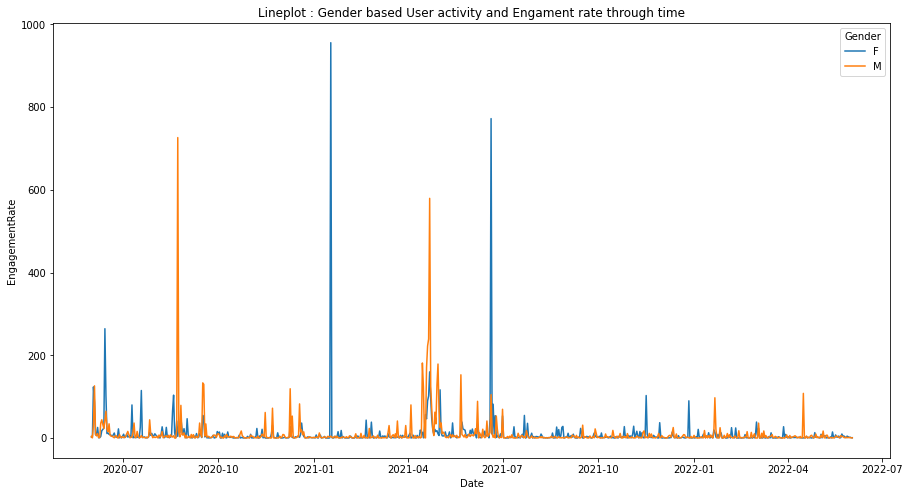

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# figure size
plt.figure(figsize=(15,8))
# simple barplot
ax = sns.lineplot(x='Date', y='EngagementRate', hue='Gender', ci=None, data=df)#
ax.set_title('Lineplot : Gender based User activity and Engament rate through time')

In [24]:
# figure size
plt.figure(figsize=(15,8))
# simple barplot
ax = sns.lineplot(x='Date', y='TotalEngagement', hue='Gender', ci=None, data=df)#
ax.set_title('Lineplot : Gender based User activity, and  total Engament through time')

Text(0.5, 1.0, 'Lineplot : Gender based User activity, and  total Engament through time')

Text(0.5, 1.0, 'Barplot')

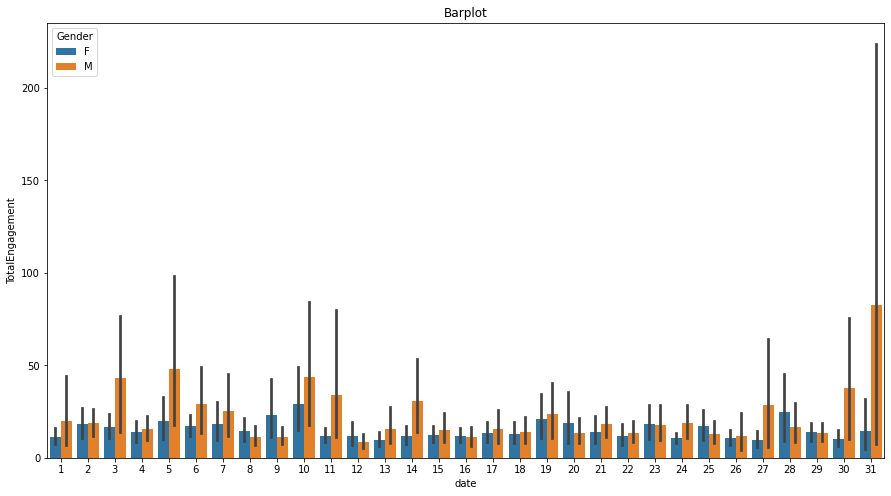

In [26]:
plt.figure(figsize=(15,8))

# simple barplot
ax = sns.barplot(x='date', y='TotalEngagement', hue='Gender', data=df)
#Cumulative plot to Total engagement by day(1-31 date)
ax.set_title('Barplot')

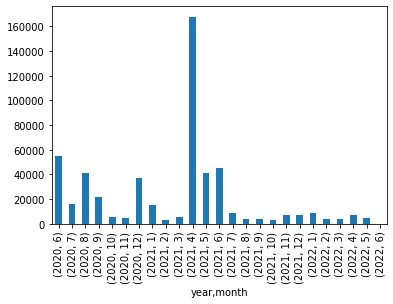

In [16]:
#Above graphs will have repeated values from year
df.groupby(['year','month'])['EngagementRate'].sum().plot.bar()#Engagement rate of each month of year

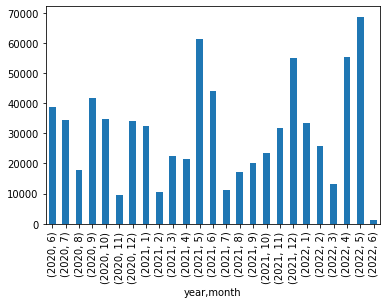

In [17]:
df.groupby(['year','month'])['TotalEngagement'].sum().plot.bar()#Total engagement of each month of year

In [20]:
#Males were getting more engagement
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of moderate activies
ax = sns.scatterplot(x='followersCount', y='EngagementRate', data=df)

ax.set_title('Scatterplot')

Text(0.5, 1.0, 'Scatterplot')

In [21]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of moderate activies
ax = sns.scatterplot(x='followersCount', y='TotalEngagement', data=df)

ax.set_title('Scatterplot')#many of the engagement happens at lower end of followers count

Text(0.5, 1.0, 'Scatterplot')

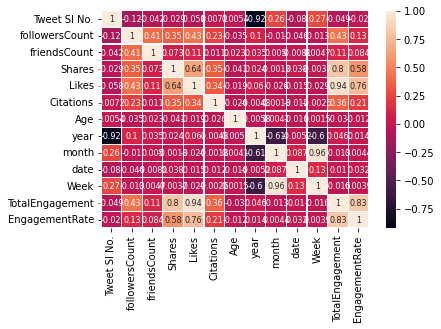

In [22]:
#max engagement is occuring at lower end of followers count

# Get correlation matrix of the df DataFrame
corr_meat = df.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.2,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()#As expected total engagement and Engagement Rate is highly correlated
#followers count is positively correlated to total engagement

In [23]:
df.head()

Tweet Sl No.         username  followersCount  friendsCount       Date  \
0             1   The_Shawn_News              86            77 2022-06-02   
1          3567   The_Shawn_News              86            77 2022-04-05   
2             2  Jaganmo05121164             317           173 2022-06-02   
3            13  Jaganmo05121164             317           173 2022-06-02   
4            36  Jaganmo05121164             317           173 2022-06-02   

       Time  Shares  Likes  Citations Gender  Age    UTC  year  month  date  \
0  06:18:01       0      1          0      F   25  00:00  2022      6     2   
1  08:25:08       0      2          0      F   25  00:00  2022      4     5   
2  05:42:00       2      4          0      M   39  00:00  2022      6     2   
3  04:22:27       0      1          0      M   39  00:00  2022      6     2   
4  01:23:10       0      1          0      M   39  00:00  2022      6     2   

   Week  TotalEngagement  EngagementRate  
0    22                1        1.162791  
1    14                2        2.325581  
2    22                6        1.892744  
3    22                1        0.315457  
4    22                1        0.315457

Shares  Likes  TotalEngagement  EngagementRate
Date                                                      
2022-06-02       0      1                1        1.162791
2022-04-05       0      2                2        2.325581
2022-06-02       2      4                6        1.892744
2022-06-02       0      1                1        0.315457
2022-06-02       0      1                1        0.315457

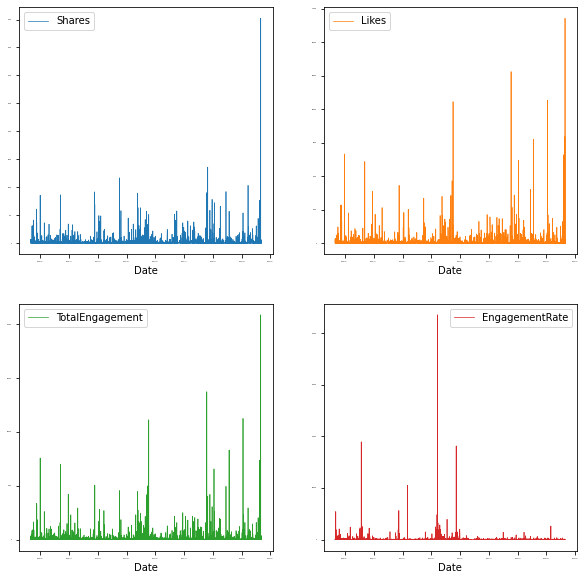

In [34]:
#Plotting all the time series data with data on x axis and jobs_subset on y axis
#all gender included here
# A subset of the jobs DataFrame
dff=df[['Date','Shares', 'Likes', 'TotalEngagement','EngagementRate']]
dff.set_index('Date', inplace=True)
dff.reset_index()
jobs_subset = dff[['Shares', 'Likes', 'TotalEngagement','EngagementRate']]

# Print the first 5 rows of jobs_subset
display(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=1.5,
                      legend=True,
                      figsize=(10,10))

plt.show()#We can see spikes in our data, it may belong to specific events

In [ ]:
##followers count of each user may increase with time
#We have many repeated values
#but it gives us a general overview of our data

In [26]:
#To find user with most engagement for every month
totalSum = df.groupby(['year','month','username']).agg({'EngagementRate': sum})#We add engagement rate for each user for year and month
totalSum.reset_index(inplace=True)#reset index
#sort Engagement rate for each month in descending order in EngagementRate rate. year month username will be in ascending order. 
totalSum=totalSum.sort_values(by=['year','month','EngagementRate','username'], ascending=[True,True,False,True])
#gets year month and username of the first Engagement rate which will be the highest
#we will miss the username with same engagement rate
totalSum=totalSum.groupby(['year','month']).first()
totalSum#We get the user with top Engagement rate for each month of the year

username  EngagementRate
year month                                 
2020 6          danger22216     6266.666667
     7          Sai84330453     3200.000000
     8       NaveeN_ReddY10    18900.000000
     9        Mohit81817580     2200.000000
     10         vijaybh4786      700.000000
     11        Indy15271423     1500.000000
     12     Ravindr77883500     5900.000000
2021 1       saibaba_chitta    10500.000000
     2              g_varam      600.000000
     3        m_dharmireddy     1640.000000
     4      VenkatP65695894    45000.000000
     5      khaitan_narayan     5450.000000
     6         Venu68550502    18100.000000
     7      BesthaAjaykumar     1987.500000
     8      KRANTHIKIRANTI1      616.666667
     9         yugandhar813      300.000000
     10        manasvideepu      400.000000
     11      Tucksaichandra     2200.000000
     12             zozoku2      900.000000
2022 1      GeethabhavaniP1     1400.000000
     2        Rajkumar96422      600.000000
     3          a_yethendra      575.000000
     4       aniketh_khatri     2600.000000
     5           thuta_rama      350.000000
     6            jagan5pjr       14.285714

In [27]:
#we will classify username based on engagement rate
#We can also use followers count to classify users
#Both Engagement rate and followers are highly correlated so we can chose one metric from them to classify
to = df.groupby('username').agg({'EngagementRate': sum})#We add engagement rate for each user 
to=to.reset_index()
to#we have 15467 users

username  EngagementRate
0          0143natasha        0.000000
1      04c85effcc044ed        2.343750
2      09071974nellore        0.000000
3              09_raju        0.000000
4      0AJAYKUMARNAIDU        0.000000
...                ...             ...
15462          zozoku2      900.000000
15463   zphsmmkandriga        0.000000
15464  zukazuk70384881      100.000000
15465         zulushiv        0.000000
15466       zyxnewshyd       12.820513

[15467 rows x 2 columns]

In [28]:
to.describe()
#we will classify 15,467 user
#Engagement rate is widely spread among user
#75% of users have below 3.125 engament rate
#mean engagement rate is 33
#some users will have high engagement, even though most engagements happens at lower end of followers

EngagementRate
count    15467.000000
mean        33.654472
std        472.379641
min          0.000000
25%          0.000000
50%          0.000000
75%          3.125000
max      45000.000000

In [29]:
#we will divide data using quantiles
#we will first create users with 4 categories, A B C D E F G H I and J.
# pandas.qcut chooses the bins so that you have the same number of records in each bin
#Our data is highly skewed hance we try to divide data into 20 parts and then we see that mmost of them are zeros and only 10 quantiles have usernames
#We label those quantiles using labels
to['quantiles'] = pd.qcut(to.EngagementRate, 20,labels=['J', 'I', 'H', 'G','F', 'E', 'D', 'C', 'B','A'],duplicates='drop')

# pd.qcut(df.rank(method='first'),to.EngagementRate,nbins)
to.head(20)#we user our data as per quantiles column

username  EngagementRate quantiles
0       0143natasha        0.000000         J
1   04c85effcc044ed        2.343750         F
2   09071974nellore        0.000000         J
3           09_raju        0.000000         J
4   0AJAYKUMARNAIDU        0.000000         J
5   0BudgetPolitics       27.272727         C
6            0Mukr0        0.413223         H
7             0_cbn        5.882353         E
8       0nlyforPSPK        0.000000         J
9        1000_south       11.904762         D
10         101010TS        0.238949         I
11   10TvTeluguNews        0.000000         J
12  10thstudentsli1      600.000000         A
13        111gulzar       50.000000         B
14      112Priyanka        0.095969         J
15        112Venkat        0.000000         J
16       11govind11        0.000000         J
17      11saifullah        0.000000         J
18          120varu        0.044578         J
19         123MUSTI        4.347826         E

In [30]:
to['quantiles'].value_counts()

J    8507
B     898
D     799
F     778
I     776
G     774
H     770
E     768
C     753
A     644
Name: quantiles, dtype: int64

In [31]:
#we can add the quantiles range if we desire
to['QuantilesRange'] = pd.qcut(to.EngagementRate, 20,duplicates='drop')
to.head(20)

username  EngagementRate quantiles    QuantilesRange
0       0143natasha        0.000000         J   (-0.001, 0.108]
1   04c85effcc044ed        2.343750         F    (1.623, 3.125]
2   09071974nellore        0.000000         J   (-0.001, 0.108]
3           09_raju        0.000000         J   (-0.001, 0.108]
4   0AJAYKUMARNAIDU        0.000000         J   (-0.001, 0.108]
5   0BudgetPolitics       27.272727         C      (12.5, 30.0]
6            0Mukr0        0.413223         H    (0.361, 0.812]
7             0_cbn        5.882353         E    (3.125, 6.101]
8       0nlyforPSPK        0.000000         J   (-0.001, 0.108]
9        1000_south       11.904762         D     (6.101, 12.5]
10         101010TS        0.238949         I    (0.108, 0.361]
11   10TvTeluguNews        0.000000         J   (-0.001, 0.108]
12  10thstudentsli1      600.000000         A  (100.0, 45000.0]
13        111gulzar       50.000000         B     (30.0, 100.0]
14      112Priyanka        0.095969         J   (-0.001, 0.108]
15        112Venkat        0.000000         J   (-0.001, 0.108]
16       11govind11        0.000000         J   (-0.001, 0.108]
17      11saifullah        0.000000         J   (-0.001, 0.108]
18          120varu        0.044578         J   (-0.001, 0.108]
19         123MUSTI        4.347826         E    (3.125, 6.101]

In [32]:
to[['quantiles','QuantilesRange']].value_counts()

quantiles  QuantilesRange  
J          (-0.001, 0.108]     8507
B          (30.0, 100.0]        898
D          (6.101, 12.5]        799
F          (1.623, 3.125]       778
I          (0.108, 0.361]       776
G          (0.812, 1.623]       774
H          (0.361, 0.812]       770
E          (3.125, 6.101]       768
C          (12.5, 30.0]         753
A          (100.0, 45000.0]     644
dtype: int64

In [ ]:
#We have classified users successfully based on Engagement Rate
#We can access any quantile eg.A quantile to classify more labelled data by repeating the process